In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
%matplotlib notebook
# from matplotlib.pylab import rcParams
# plt.rcParams['figure.figsize']=(50,12)
# from matplotlib.pyplot import figure
# figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import acf, pacf
from sklearn import preprocessing
from sklearn import metrics 


In [2]:
name="China_XPS Series"
df= pd.read_csv('category/country/productwise/'+name+'.csv',index_col=['Date'],parse_dates=['Date'])

In [3]:
del df['Unnamed: 0']
df.head()

,Units Sold,Total Revenue
Date,,
2010-01-01,38514,7922329.8
2010-01-02,39165,8056240.5
2010-01-03,69047,14202967.9
2010-01-04,65453,13463682.1
2010-01-05,72040,14818628.0


In [4]:
del df['Units Sold']
print(df.head())
# def change(old):
# 	return datetime.datetime.strptime(old , '%Y-%m-%d')
# df['date']  = df['date'].apply(change)
print (df.dtypes)
df=df.iloc[:700,:]


            Total Revenue
Date                     
2010-01-01      7922329.8
2010-01-02      8056240.5
2010-01-03     14202967.9
2010-01-04     13463682.1
2010-01-05     14818628.0
Total Revenue    float64
dtype: object


In [5]:
s = pd.Series(df['Total Revenue'])

In [6]:
s

Date
2010-01-01     7922329.8
2010-01-02     8056240.5
2010-01-03    14202967.9
2010-01-04    13463682.1
2010-01-05    14818628.0
2010-01-06     5618695.5
2010-01-07    11446382.2
2010-01-08    17327756.6
2010-01-09     4839503.9
2010-01-10    16004077.1
2010-01-11    13122220.1
2010-01-12     7873167.5
2010-01-13    15966434.0
2010-01-14     4292547.6
2010-01-15    11697541.9
2010-01-16    10286028.5
2010-01-17     9279949.8
2010-01-18    13195243.6
2010-01-19    13741377.1
2010-01-20    18590754.6
2010-01-21     4041799.3
2010-01-22    13502970.8
2010-01-23    12179291.3
2010-01-24     8101083.1
2010-01-25     9135754.1
2010-01-26    10125171.1
2010-01-27     9552502.3
2010-01-28    16110424.0
2010-01-29     6020633.3
2010-01-30    14287922.0
                 ...    
2011-11-02    13968881.3
2011-11-03    21767379.7
2011-11-04    11177943.7
2011-11-05     9800370.8
2011-11-06    14303143.8
2011-11-07    13658480.0
2011-11-08     5971059.6
2011-11-09    10700514.0
2011-11-10    146421

In [7]:
# s['2017-01-01']

In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=30)
    rolstd = pd.rolling_std(timeseries, window=30)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original',linewidth=0.6)
    mean = plt.plot(rolmean, color='red', label='Rolling Mean',linewidth=1)
    std = plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth=1)
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    #plt.set_size_inches(18.5, 10.5, forward=True)
    plt.savefig('test2png.png', dpi=100)
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/home/govind/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=30).mean()
  """
/home/govind/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=30).std()
  


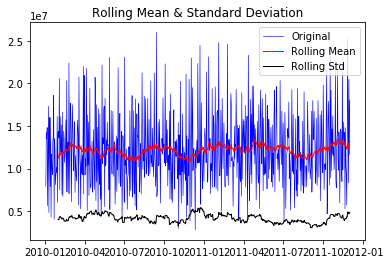

Results of Dickey-Fuller Test:
Test Statistic                  -4.359210
p-value                          0.000350
#Lags Used                      19.000000
Number of Observations Used    680.000000
Critical Value (1%)             -3.440003
Critical Value (10%)            -2.569038
Critical Value (5%)             -2.865800
dtype: float64


In [9]:
test_stationarity(s)

In [10]:
s_log = np.log(s)
# plt.plot(s_log)
# plt.show()

In [11]:
moving_avg = pd.rolling_mean(s_log,30)
# plt.plot(s_log)
# plt.plot(moving_avg, color='red')

/home/govind/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=30).mean()
  """Entry point for launching an IPython kernel.


In [12]:
s_log_moving_avg_diff = s_log - moving_avg
s_log_moving_avg_diff.head(30)

Date
2010-01-01        NaN
2010-01-02        NaN
2010-01-03        NaN
2010-01-04        NaN
2010-01-05        NaN
2010-01-06        NaN
2010-01-07        NaN
2010-01-08        NaN
2010-01-09        NaN
2010-01-10        NaN
2010-01-11        NaN
2010-01-12        NaN
2010-01-13        NaN
2010-01-14        NaN
2010-01-15        NaN
2010-01-16        NaN
2010-01-17        NaN
2010-01-18        NaN
2010-01-19        NaN
2010-01-20        NaN
2010-01-21        NaN
2010-01-22        NaN
2010-01-23        NaN
2010-01-24        NaN
2010-01-25        NaN
2010-01-26        NaN
2010-01-27        NaN
2010-01-28        NaN
2010-01-29        NaN
2010-01-30    0.32319
Name: Total Revenue, dtype: float64

/home/govind/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=30).mean()
  """
/home/govind/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=30).std()
  


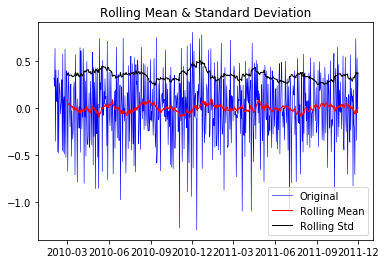

Results of Dickey-Fuller Test:
Test Statistic                  -5.542759
p-value                          0.000002
#Lags Used                      19.000000
Number of Observations Used    651.000000
Critical Value (1%)             -3.440435
Critical Value (10%)            -2.569140
Critical Value (5%)             -2.865990
dtype: float64


In [13]:
s_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(s_log_moving_avg_diff)

/home/govind/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,adjust=True,ignore_na=False,halflife=30).mean()
  """Entry point for launching an IPython kernel.


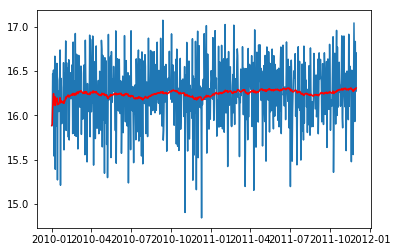

In [14]:
expwighted_avg = pd.ewma(s_log, halflife=30)
plt.plot(s_log)
plt.plot(expwighted_avg, color='red')

/home/govind/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=30).mean()
  """
/home/govind/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=30).std()
  


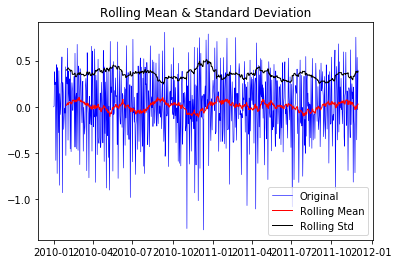

Results of Dickey-Fuller Test:
Test Statistic                  -4.850298
p-value                          0.000044
#Lags Used                      19.000000
Number of Observations Used    680.000000
Critical Value (1%)             -3.440003
Critical Value (10%)            -2.569038
Critical Value (5%)             -2.865800
dtype: float64


In [15]:
s_log_ewma_diff = s_log - expwighted_avg
test_stationarity(s_log_ewma_diff)

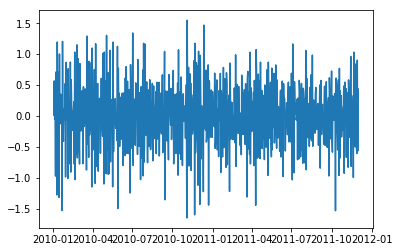

In [16]:
s_log_diff = s_log - s_log.shift()
plt.plot(s_log_diff)

/home/govind/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=30).mean()
  """
/home/govind/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=30).std()
  


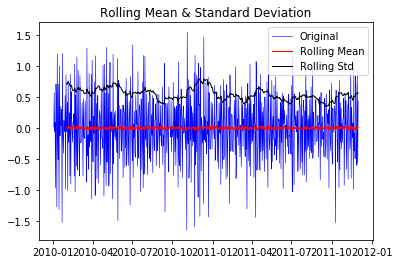

Results of Dickey-Fuller Test:
Test Statistic                -1.306334e+01
p-value                        2.026063e-24
#Lags Used                     1.800000e+01
Number of Observations Used    6.800000e+02
Critical Value (1%)           -3.440003e+00
Critical Value (10%)          -2.569038e+00
Critical Value (5%)           -2.865800e+00
dtype: float64


In [17]:
s_log_diff.dropna(inplace=True)
test_stationarity(s_log_diff)

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(s_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# plt.subplot(411)
# plt.plot(s_log, label='Original')
# plt.legend(loc='best')
# plt.subplot(412)
# plt.plot(trend, label='Trend')
# plt.legend(loc='best')
# plt.subplot(413)
# plt.plot(seasonal,label='Seasonality')
# plt.legend(loc='best')
# plt.subplot(414)
# plt.plot(residual, label='Residuals')
# plt.legend(loc='best')
# plt.tight_layout()

/home/govind/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=30).mean()
  """
/home/govind/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=30).std()
  


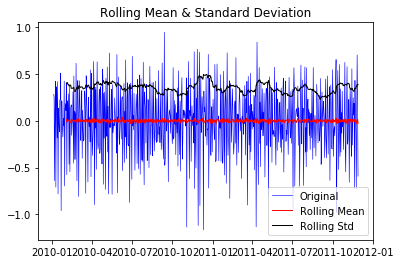

Results of Dickey-Fuller Test:
Test Statistic                -1.618055e+01
p-value                        4.270903e-29
#Lags Used                     1.800000e+01
Number of Observations Used    6.750000e+02
Critical Value (1%)           -3.440075e+00
Critical Value (10%)          -2.569055e+00
Critical Value (5%)           -2.865831e+00
dtype: float64


In [19]:
s_log_decompose = residual
s_log_decompose.dropna(inplace=True)
test_stationarity(s_log_decompose)

In [20]:
lag_acf = acf(s_log_diff, nlags=20)
lag_pacf = pacf(s_log_diff, nlags=20, method='ols')

In [21]:
# %%time
# #Plot ACF: 
# plt.subplot(121) 
# plt.plot(lag_acf)
# plt.axhline(y=0,linestyle='--',color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(s_log_diff)),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(s_log_diff)),linestyle='--',color='gray')
# plt.title('Autocorrelation Function')
# #Plot PACF:
# plt.subplot(122)
# plt.plot(lag_pacf)
# plt.axhline(y=0,linestyle='--',color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(s_log_diff)),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(s_log_diff)),linestyle='--',color='gray')
# plt.title('Partial Autocorrelation Function')
# plt.tight_layout()

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [23]:
%%time
print('hi')
model = ARIMA(s_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
# plt.plot(s_log_diff)
# plt.plot(results_ARIMA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-s_log_diff)**2))

hi


/home/govind/.local/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/govind/.local/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


CPU times: user 892 ms, sys: 688 ms, total: 1.58 s
Wall time: 944 ms


In [24]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Date
2010-01-02    0.000107
2010-01-03   -0.009617
2010-01-04   -0.459004
2010-01-05   -0.287233
2010-01-06   -0.317781
dtype: float64


In [25]:
print (predictions_ARIMA_diff)

Date
2010-01-02    0.000107
2010-01-03   -0.009617
2010-01-04   -0.459004
2010-01-05   -0.287233
2010-01-06   -0.317781
2010-01-07    0.700590
2010-01-08   -0.128523
2010-01-09   -0.542127
2010-01-10    0.863168
2010-01-11   -0.498989
2010-01-12   -0.238996
2010-01-13    0.334412
2010-01-14   -0.461719
2010-01-15    1.010125
2010-01-16   -0.160842
2010-01-17   -0.008513
2010-01-18    0.106150
2010-01-19   -0.290861
2010-01-20   -0.320380
2010-01-21   -0.641597
2010-01-22    1.097643
2010-01-23   -0.305681
2010-01-24   -0.176170
2010-01-25    0.290288
2010-01-26    0.143181
2010-01-27    0.021668
2010-01-28    0.086784
2010-01-29   -0.507654
2010-01-30    0.625165
2010-01-31   -0.375779
                ...   
2011-11-02   -0.142429
2011-11-03   -0.194566
2011-11-04   -0.711440
2011-11-05    0.066959
2011-11-06    0.220362
2011-11-07   -0.220723
2011-11-08   -0.166488
2011-11-09    0.798820
2011-11-10    0.117455
2011-11-11   -0.248322
2011-11-12   -0.218786
2011-11-13    0.182275
2011-1

In [26]:
# predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
# print (predictions_ARIMA_diff_cumsum.head())

In [27]:
# print (predictions_ARIMA_diff_cumsum)

In [28]:
predictions_ARIMA_log = pd.Series(s_log.ix[0], index=s_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff,fill_value=0)
predictions_ARIMA_log.head()

/home/govind/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2010-01-01    15.885196
2010-01-02    15.885303
2010-01-03    15.875579
2010-01-04    15.426191
2010-01-05    15.597962
dtype: float64

In [29]:
print(predictions_ARIMA_log)

Date
2010-01-01    15.885196
2010-01-02    15.885303
2010-01-03    15.875579
2010-01-04    15.426191
2010-01-05    15.597962
2010-01-06    15.567415
2010-01-07    16.585786
2010-01-08    15.756673
2010-01-09    15.343069
2010-01-10    16.748364
2010-01-11    15.386206
2010-01-12    15.646200
2010-01-13    16.219608
2010-01-14    15.423477
2010-01-15    16.895321
2010-01-16    15.724354
2010-01-17    15.876683
2010-01-18    15.991345
2010-01-19    15.594335
2010-01-20    15.564816
2010-01-21    15.243598
2010-01-22    16.982839
2010-01-23    15.579515
2010-01-24    15.709026
2010-01-25    16.175484
2010-01-26    16.028377
2010-01-27    15.906863
2010-01-28    15.971980
2010-01-29    15.377542
2010-01-30    16.510361
                ...    
2011-11-02    15.742767
2011-11-03    15.690630
2011-11-04    15.173756
2011-11-05    15.952155
2011-11-06    16.105558
2011-11-07    15.664473
2011-11-08    15.718707
2011-11-09    16.684016
2011-11-10    16.002650
2011-11-11    15.636874
2011-11-12 

Text(0.5,1,'RMSE: 0.6266')

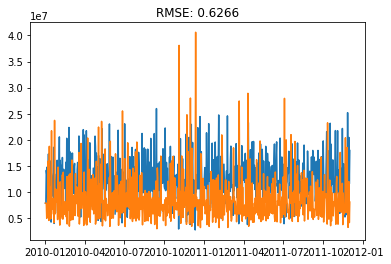

In [30]:
# # predictions_ARIMA = np.exp(predictions_ARIMA_log)
# plt.plot(s)
# plt.plot(predictions_ARIMA)
# plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-s)**2)/len(s)))
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(s)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_log-s_log)**2)/len(s)))

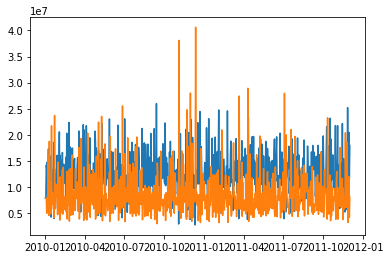

In [31]:
import mpld3
from matplotlib.pyplot import figure
fig = figure()
ax = fig.gca()
ax.plot(s)
ax.plot(predictions_ARIMA)
mpld3.save_html(fig,'images/'+name+'.html')

In [32]:
print(predictions_ARIMA)

Date
2010-01-01    7.922330e+06
2010-01-02    7.923176e+06
2010-01-03    7.846508e+06
2010-01-04    5.006219e+06
2010-01-05    5.944414e+06
2010-01-06    5.765573e+06
2010-01-07    1.596303e+07
2010-01-08    6.966846e+06
2010-01-09    4.606913e+06
2010-01-10    1.878115e+07
2010-01-11    4.809994e+06
2010-01-12    6.238184e+06
2010-01-13    1.106843e+07
2010-01-14    4.992649e+06
2010-01-15    2.175427e+07
2010-01-16    6.745284e+06
2010-01-17    7.855173e+06
2010-01-18    8.809537e+06
2010-01-19    5.922889e+06
2010-01-20    5.750607e+06
2010-01-21    4.170717e+06
2010-01-22    2.374397e+07
2010-01-23    5.835760e+06
2010-01-24    6.642679e+06
2010-01-25    1.059067e+07
2010-01-26    9.141880e+06
2010-01-27    8.095861e+06
2010-01-28    8.640579e+06
2010-01-29    4.768500e+06
2010-01-30    1.480330e+07
                  ...     
2011-11-02    6.870635e+06
2011-11-03    6.521597e+06
2011-11-04    3.889362e+06
2011-11-05    8.470964e+06
2011-11-06    9.875404e+06
2011-11-07    6.353226e

In [33]:
s_log

Date
2010-01-01    15.885196
2010-01-02    15.901958
2010-01-03    16.468962
2010-01-04    16.415506
2010-01-05    16.511396
2010-01-06    15.541610
2010-01-07    16.253184
2010-01-08    16.667820
2010-01-09    15.392323
2010-01-10    16.588354
2010-01-11    16.389818
2010-01-12    15.878971
2010-01-13    16.585999
2010-01-14    15.272391
2010-01-15    16.274889
2010-01-16    16.146297
2010-01-17    16.043367
2010-01-18    16.395367
2010-01-19    16.435922
2010-01-20    16.738175
2010-01-21    15.212201
2010-01-22    16.418420
2010-01-23    16.315248
2010-01-24    15.907508
2010-01-25    16.027706
2010-01-26    16.130535
2010-01-27    16.072314
2010-01-28    16.594977
2010-01-29    15.610703
2010-01-30    16.474925
                ...    
2011-11-02    16.452343
2011-11-03    16.895923
2011-11-04    16.229453
2011-11-05    16.097931
2011-11-06    16.475990
2011-11-07    16.429871
2011-11-08    15.602435
2011-11-09    16.185802
2011-11-10    16.499414
2011-11-11    16.474508
2011-11-12 

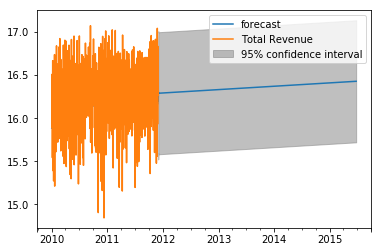

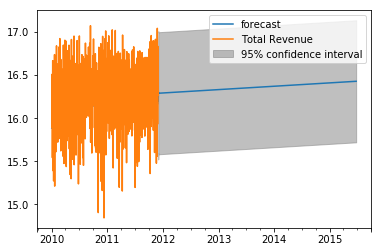

In [34]:
results_ARIMA.plot_predict(1,2000)
#x=results_ARIMA.forecast(steps=30)